In [1]:
#Load libraries
import csv
from textblob import TextBlob
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk 
import textmining
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
cd = pd.read_csv("G:/Amazon_Unlocked_Mobile.csv")

In [3]:
a = cd[["Brand Name","Reviews"]] #Selecting few columns

In [4]:
a

,Brand Name,Reviews
0,Samsung,I feel so LUCKY to have found this used (phone...
1,Samsung,"nice phone, nice up grade from my pantach revu..."
2,Samsung,Very pleased
3,Samsung,It works good but it goes slow sometimes but i...
4,Samsung,Great phone to replace my lost phone. The only...
5,Samsung,I already had a phone with problems... I know ...
6,Samsung,The charging port was loose. I got that solder...
7,Samsung,"Phone looks good but wouldn't stay charged, ha..."
8,Samsung,I originally was using the Samsung S2 Galaxy f...
9,Samsung,It's battery life is great. It's very responsi...


In [5]:
# Select few text
a = a.iloc[:500]

In [6]:
a

,Brand Name,Reviews
0,Samsung,I feel so LUCKY to have found this used (phone...
1,Samsung,"nice phone, nice up grade from my pantach revu..."
2,Samsung,Very pleased
3,Samsung,It works good but it goes slow sometimes but i...
4,Samsung,Great phone to replace my lost phone. The only...
5,Samsung,I already had a phone with problems... I know ...
6,Samsung,The charging port was loose. I got that solder...
7,Samsung,"Phone looks good but wouldn't stay charged, ha..."
8,Samsung,I originally was using the Samsung S2 Galaxy f...
9,Samsung,It's battery life is great. It's very responsi...


In [2]:
# Download Repository
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
# Extract stop words
stop = set(stopwords.words("english"))


In [8]:
# Remove punctuation marks
exclude = set(string.punctuation)

In [9]:
# Text pre processing
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = " ".join([ch for ch in stop_free.lower().split() if ch not in exclude])
    num_free = " ".join(i for i in punc_free if not i.isdigit())
    return num_free
post_corpus = [clean(a.iloc[i,1]) for i in range(0, a.shape[0])] # df.shape[0] gives no of observations present in df

In [10]:
post_corpus

['f e e l   l u c k y   f o u n d   u s e d   ( p h o n e   u s   u s e d   h a r d   a l l ) ,   p h o n e   l i n e   s o m e o n e   u p g r a d e d   s o l d   o n e .   s o n   l i k e d   o l d   o n e   f i n a l l y   f e l l   a p a r t   . +   y e a r s   w a n t   u p g r a d e ! !   t h a n k   s e l l e r ,   r e a l l y   a p p r e c i a t e   h o n e s t y   r e :   s a i d   u s e d   p h o n e . i   r e c o m m e n d   s e l l e r   h i g h l y   w o u l d   a g a i n ! !',
 'n i c e   p h o n e ,   n i c e   g r a d e   p a n t a c h   r e v u e .   c l e a n   s e t   e a s y   s e t   u p .   n e v e r   a n d r o i d   p h o n e   f a n t a s t i c   s a y   l e a s t .   p e r f e c t   s i z e   s u r f i n g   s o c i a l   m e d i a .   g r e a t   p h o n e   s a m s u n g',
 'p l e a s e d',
 'w o r k s   g o o d   g o e s   s l o w   s o m e t i m e s   g o o d   p h o n e   l o v e',
 'g r e a t   p h o n e   r e p l a c e   l o s t   p h o n e .   t h i n 

# Creating Document Matrix

In [33]:
# Create document term matrix
tdm = textmining.TermDocumentMatrix()

for i in post_corpus:
    
    tdm.add_doc(i)
    

In [31]:
# Write tdm
tdm.to_csv("E:/TDM_DataFRame.csv", index = 'FALSE')

In [16]:
import numpy as np

In [26]:
tdm = np.matrix(tdm)

In [34]:
tdm = pd.DataFrame(tdm)

ValueError: DataFrame constructor not properly called!

In [32]:
tdm

,0
0,<textmining.TermDocumentMatrix object at 0x000...


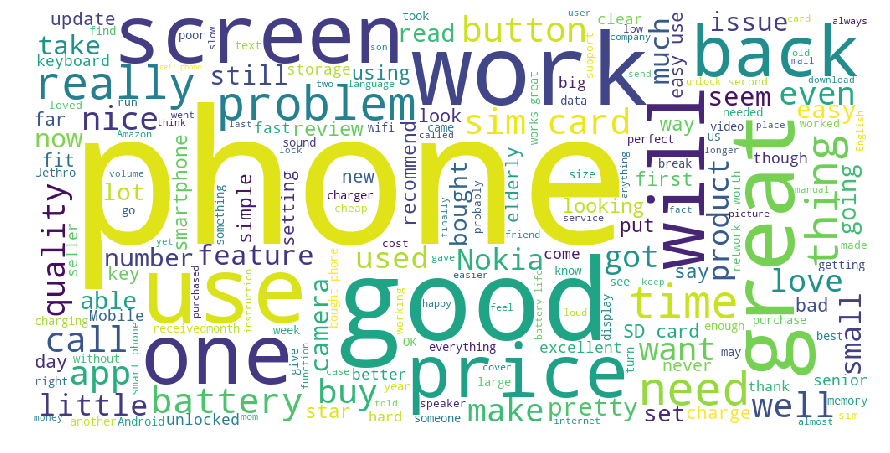

In [37]:
# Plot wordcloud
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(a['Reviews']))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Sentimental Analysis


In [38]:
# Sentiment analysis using Text Blob       
# Create empty dataframe to store results
FinalResults = pd.DataFrame()

# Run Engine
for i in range(0, a.shape[0]): #here we are using raw data as textblob removes punctuations,stopwords,casefolding,etc by default
    
    blob = TextBlob(a.iloc[i,1])
    
    temp = pd.DataFrame({'Reviews': a.iloc[i,1], 'Polarity': blob.sentiment.polarity}, index = [0])
    
    FinalResults = FinalResults.append(temp)    

In [41]:
FinalResults.head(40)

,Polarity,Reviews
0,0.180952,I feel so LUCKY to have found this used (phone...
0,0.449259,"nice phone, nice up grade from my pantach revu..."
0,0.650000,Very pleased
0,0.452500,It works good but it goes slow sometimes but i...
0,0.214583,Great phone to replace my lost phone. The only...
0,-0.300000,I already had a phone with problems... I know ...
0,0.019814,The charging port was loose. I got that solder...
0,0.516460,"Phone looks good but wouldn't stay charged, ha..."
0,0.267692,I originally was using the Samsung S2 Galaxy f...
0,0.222222,It's battery life is great. It's very responsi...


# Another method using vader

In [42]:
# Sentiment Analysis using Vader
FinalResults_Vader = pd.DataFrame()  #vader works as textblob but additional Feature of Vadar is to identify excitedwords like happpy

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in range(0, a.shape[0]):
    
    snt = analyzer.polarity_scores(a.iloc[i,1])
    
    temp = pd.DataFrame({'Reviews': a.iloc[i,1], 'Polarity': list(snt.items())[3][1]}, index = [0])

    FinalResults_Vader = FinalResults_Vader.append(temp)    